In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df0116_1216 = pd.read_csv('ticket_data/PRR_P000731_082418_070116_to_123116.csv')

df0117_0617 = pd.read_csv('ticket_data/PRR_P000731_082418_010117_to_0630017.csv')
df0717_1217 = pd.read_csv('ticket_data/PRR_P000731_082418_070117_to_1231017.csv')

df0110_0618 = pd.read_csv('ticket_data/PRR_P000731_082418_010118_to_0630018.csv')
df0718_0818 = pd.read_csv('ticket_data/PRR_P000731_082418_070118_to_083118.csv')

#address = pd.read_csv('openaddr-collected-us_west/san_francisco.csv')

#sweeper_scheudle = pd.read_csv('Historical_Street_Sweeper_Scheduled_Routes.csv')


/Users/angellei/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


If you park at a certain spot, what's the probaility of getting a ticket or not in that spot for upcoming week or hours assume people are lazy, they
don't want to drive around to find another spot or you got no choice but to park at that particular spot

predict it by graphing a distribution of number of ticker in that street, then use time series to compare 
the week, day, and hour for next week or month. 

TO predict breaking-law(ticket) rate by drivers in SF. Predict the probability of getting a ticket
to predict the a weekly or housrly or daily percentage of getting ticket in that particular street in SF. 
helping government to predict for example next month 
USE time series model to predict the next week or month of breaking-law(ticket) rate

Target is violation description
Features include ticket issue date, ticket issue time, ticker year, ticker number, ticket street name, and ticket street number.

Groupby the violation description into different categories like bus zone, park prohib, restircted area, etc...
Based on differnt cateogrical, when and what time that most ticket was written based on the day and time ticket issued. 


Further investigation maybe putting those ticket street name into a san francisco map to show which district has most 
ticket written.

Maybe we can predict the traffic volume by total tickets I have

Maybe we can classify the car-type or reason for getting a ticket by looking it month by month and day by day.


FINAL TOPIC: To predict the traffic volume(how busy the street is) by looking at how many tickets got in the streeet by certain hours in a day. Maybe in a rush hours more often got a ticket? 
Because more people are violated in rush hours than other time. 
Witht the assumption that there's a relationship between getting a ticket in busy street. 

In [3]:
df0116_1216.columns=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
df0116_1216.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2016,1002894970,07/01/2016,07:35,12.0,000038,FORD,NaN,NOT GIVEN,CA,56151T1,10/31/2016,TRC7.2.40,PRK PROHIB,NaN,1231.0,MARKET,$105,NaN
1,2016,1003836901,07/01/2016,06:30,1.0,001871,INFI,SU,0449,CA,6TLJ220,1/14/2016,TRC7.2.42,RESTRICTED,NaN,1001.0,POTRERO,$289,NaN
2,2016,1004040273,07/01/2016,19:39,7.0,000910,HOND,2D,NOT GIVEN,CA,4DQY792,11/18/2016,V22500I,BUS ZONE,NaN,3274.0,24TH,$0,$409
3,2016,1004040284,07/01/2016,19:40,7.0,000910,TOYT,4D,NOT GIVEN,CA,5ZGU877,NaN,V22500I,BUS ZONE,NaN,3278.0,24TH,$288,NaN
4,2016,1004040295,07/01/2016,21:45,7.0,000910,HOND,4D,NOT GIVEN,CA,7FFM051,8/18/2016,V22500I,BUS ZONE,NaN,3018.0,MISSION,$288,NaN


In [4]:
df0117_0617.columns=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
df0117_0617.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2017,002776G,01/01/2017,12:37,6.0,000020,VOLV,4D,NOT GIVEN,OR,7HRU780,1/24/2017,GO1.I.6B,PKG PROHIB,NaN,NaN,E,$204,NaN
1,2017,002777G,01/01/2017,12:40,6.0,,FORD,SU,1I6B,CA,7BHY010,7/02/2017,GO1.I.6B,PKG PROHIB,NaN,NaN,E,$82,NaN
2,2017,002778G,01/01/2017,12:42,6.0,000020,KIA,4D,NOT GIVEN,,7PQM779,NaN,GO1.I.6B,PKG PROHIB,NaN,NaN,E,$0,$82
3,2017,1002831841,01/01/2017,00:01,7.0,000909,LEXU,4D,NOT GIVEN,CA,6AGJ665,10/08/2017,V22500I,BUS ZONE,NaN,720.0,MISSION,$319,NaN
4,2017,1002832504,01/01/2017,17:37,7.0,000909,TOYT,4D,NOT GIVEN,CA,7ESZ671,3/02/2017,V22500I,BUS ZONE,NaN,1774.0,SACRAMENTO,$0,$409


In [5]:
df0717_1217.columns=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
df0717_1217.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2017,003757G,07/01/2017,10:19,6.0,17,NISS,NaN,NOT GIVEN,TX,JLB 4484,NaN,GO1.I.6M,OBSTRCT TR,NaN,NaN,E,$107,NaN
1,2017,003758G,07/01/2017,09:17,6.0,17,MERZ,NaN,NOT GIVEN,CA,6CIF208,2/18/2018,GO1.I.6G,SAFE/RED Z,NaN,NaN,E,$97,NaN
2,2017,003760G,07/01/2017,10:53,6.0,17,FORD,SU,NOT GIVEN,CA,09631X1,8/31/2017,GO1.I.6G,SAFE/RED Z,NaN,NaN,E,$97,NaN
3,2017,1003837295,07/01/2017,15:41,1.0,2252,MERZ,4D,9347,CA,4XUB831,6/12/2018,V5204A,REG TABS,NaN,375.0,LAGUNA HONDA BVLD K,$10,NaN
4,2017,1003921096,07/01/2017,16:24,1.0,358,HYUN,4D,1263,,7ZBD809,NaN,TRC7.2.25,RED ZONE,NaN,199.0,JEFFERSON,$110,NaN


In [6]:
df0110_0618.columns=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
df0110_0618.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2018,003959G,01/01/2018,11:47,6,000017,TOYT,VN,NOT GIVEN,CA,8BKD091,12/08/2018,GO1.I.6O,BUS ZONE,NaN,NaN,E,$303,NaN
1,2018,1003806860,01/01/2018,10:58,7,000636,HYUN,2D,5153,CA,7UQY927,10/08/2018,TRC7.2.25,RED ZONE,NaN,40.0,CHMASERO,$110,NaN
2,2018,1004302051,01/01/2018,14:33,1,001866,TOYT,4D,8348,CA,6USE184,1/12/2018,TRC7.2.42,RESTRICTED,NaN,1015.0,TURK,$0,$173
3,2018,1004504664,01/01/2018,18:56,7,000821,FORD,TK,NOT GIVEN,CA,6K26246,9/30/2018,TRC7.2.41,PK PHB OTD,NaN,4458.0,MISSION,$0,$223
4,2018,1004504690,01/01/2018,18:33,7,000821,CADI,SU,NOT GIVEN,CA,5GMY264,3/18/2018,V22500H,DBL PARK,NaN,4500.0,MISSION,$110,NaN


In [7]:
df0718_0818.columns=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
df0718_0818.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2018,1000302575,07/01/2018,12:36,7,000913,FORD,4D,5282,CA,7HDU218,9/10/2018,TRC7.2.45,TMP PK RES,NaN,1730.0,STEINER,$76,NaN
1,2018,1000302586,07/01/2018,12:40,7,000913,AUDI,4D,2017,CA,7ZJM060,8/02/2019,TRC7.2.45,TMP PK RES,NaN,1801.0,STEINER,$76,NaN
2,2018,1000302601,07/01/2018,15:27,7,000931,JEEP,4D,7822,,7XEY038,NaN,TRC7.2.45,TMP PK RES,NaN,1801.0,STEINER,$76,NaN
3,2018,1004650592,07/01/2018,06:40,7,000921,FIAT,2D,8368,CA,7VMY842,11/18/2018,V22521,RR TRACKS,NaN,600.0,DUBOCE,$108,NaN
4,2018,1004890121,07/01/2018,17:19,7,000855,HYUN,4D,NOT GIVEN,CA,7HDV935,12/20/2018,V22500H,DBL PARK,NaN,925.0,MARKET,$143,NaN


In [8]:
#concat three files into one 
ticket = pd.concat([df0116_1216, df0117_0617, df0717_1217, df0110_0618, df0718_0818])
ticket.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2016,1002894970,07/01/2016,07:35,12.0,000038,FORD,NaN,NOT GIVEN,CA,56151T1,10/31/2016,TRC7.2.40,PRK PROHIB,NaN,1231.0,MARKET,$105,NaN
1,2016,1003836901,07/01/2016,06:30,1.0,001871,INFI,SU,0449,CA,6TLJ220,1/14/2016,TRC7.2.42,RESTRICTED,NaN,1001.0,POTRERO,$289,NaN
2,2016,1004040273,07/01/2016,19:39,7.0,000910,HOND,2D,NOT GIVEN,CA,4DQY792,11/18/2016,V22500I,BUS ZONE,NaN,3274.0,24TH,$0,$409
3,2016,1004040284,07/01/2016,19:40,7.0,000910,TOYT,4D,NOT GIVEN,CA,5ZGU877,NaN,V22500I,BUS ZONE,NaN,3278.0,24TH,$288,NaN
4,2016,1004040295,07/01/2016,21:45,7.0,000910,HOND,4D,NOT GIVEN,CA,7FFM051,8/18/2016,V22500I,BUS ZONE,NaN,3018.0,MISSION,$288,NaN


In [9]:
#rename the dataframe
new_ticket = ticket.rename(index=str, columns={1: "Issue_Year", 2: "Ticket_Number", 3: "Tick_Issue_Date", 4: "Tick_Issue_Time", 5: "Agency",
                                                   6: "Tick_Badge_Issued", 7: "Veh_Make", 8:"Veh_Body", 9: "Tick_VIN", 10: "Tick_RP_State",
                                                   11: "Tick_RP_Plate", 12: "Plate_Exp_Date" , 13: "Violation", 14: "Violation_Desc", 15: "Tick_Meter",
                                                   16: "Tick_Street_No", 17: "Tick_Street_Name", 18: "Total_Paid", 19: "Total_Amt_Due"})
new_ticket.head()

,Issue_Year,Ticket_Number,Tick_Issue_Date,Tick_Issue_Time,Agency,Tick_Badge_Issued,Veh_Make,Veh_Body,Tick_VIN,Tick_RP_State,Tick_RP_Plate,Plate_Exp_Date,Violation,Violation_Desc,Tick_Meter,Tick_Street_No,Tick_Street_Name,Total_Paid,Total_Amt_Due
0,2016,1002894970,07/01/2016,07:35,12.0,000038,FORD,NaN,NOT GIVEN,CA,56151T1,10/31/2016,TRC7.2.40,PRK PROHIB,NaN,1231.0,MARKET,$105,NaN
1,2016,1003836901,07/01/2016,06:30,1.0,001871,INFI,SU,0449,CA,6TLJ220,1/14/2016,TRC7.2.42,RESTRICTED,NaN,1001.0,POTRERO,$289,NaN
2,2016,1004040273,07/01/2016,19:39,7.0,000910,HOND,2D,NOT GIVEN,CA,4DQY792,11/18/2016,V22500I,BUS ZONE,NaN,3274.0,24TH,$0,$409
3,2016,1004040284,07/01/2016,19:40,7.0,000910,TOYT,4D,NOT GIVEN,CA,5ZGU877,NaN,V22500I,BUS ZONE,NaN,3278.0,24TH,$288,NaN
4,2016,1004040295,07/01/2016,21:45,7.0,000910,HOND,4D,NOT GIVEN,CA,7FFM051,8/18/2016,V22500I,BUS ZONE,NaN,3018.0,MISSION,$288,NaN


In [10]:
new_ticket.shape

(2895501, 19)

In [11]:
new_ticket[new_ticket['Tick_Issue_Time'] < '09:00']

,Issue_Year,Ticket_Number,Tick_Issue_Date,Tick_Issue_Time,Agency,Tick_Badge_Issued,Veh_Make,Veh_Body,Tick_VIN,Tick_RP_State,Tick_RP_Plate,Plate_Exp_Date,Violation,Violation_Desc,Tick_Meter,Tick_Street_No,Tick_Street_Name,Total_Paid,Total_Amt_Due
0,2016,1002894970,07/01/2016,07:35,12.0,000038,FORD,NaN,NOT GIVEN,CA,56151T1,10/31/2016,TRC7.2.40,PRK PROHIB,NaN,1231.0,MARKET,$105,NaN
1,2016,1003836901,07/01/2016,06:30,1.0,001871,INFI,SU,0449,CA,6TLJ220,1/14/2016,TRC7.2.42,RESTRICTED,NaN,1001.0,POTRERO,$289,NaN
9,2016,1004180505,07/01/2016,07:08,1.0,000191,MERC,4D,5720,CA,7ARL780,12/18/2016,TRC7.2.40,PRK PROHIB,NaN,455.0,MARKET,$0,$226
19,2016,34866591T,07/01/2016,07:35,9.0,61,5517,IB,NaN,CA,NaN,NaN,TRC7.2.104B,MISUS CLPC,NaN,NaN,VAN NESS,$112,NaN
20,2016,34866602T,07/01/2016,07:52,9.0,61,5630,IB,NaN,CA,NaN,NaN,TRC7.2.104B,MISUS CLPC,NaN,NaN,SACRAMENTO,$0,$233
21,2016,34866613T,07/01/2016,08:05,9.0,61,5498,IB,NaN,CA,NaN,NaN,TRC7.2.101C,UNAUTHFARE,NaN,NaN,VAN NESS,$143,NaN
22,2016,34866624T,07/01/2016,08:20,9.0,61,5509,IB,NaN,CA,NaN,NaN,TRC7.2.101C,UNAUTHFARE,NaN,NaN,VAN NESS,$0,$233
23,2016,34866635T,07/01/2016,08:45,9.0,61,5558,IB,NaN,CA,NaN,NaN,TRC7.2.101C,UNAUTHFARE,NaN,NaN,SACRAMENTO,$112,NaN
52,2016,34872106T,07/01/2016,07:57,9.0,64,5417,IB,NaN,CA,NaN,NaN,TRC7.2.104B,MISUS CLPC,NaN,NaN,MARKET,$0,$233
53,2016,34872110T,07/01/2016,08:13,9.0,64,8657,IB,NaN,CA,NaN,NaN,TRC7.2.101C,UNAUTHFARE,NaN,NaN,MARKET,$0,$233


## EDA

In [12]:
new_ticket.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2895501 entries, 0 to 227032
Data columns (total 19 columns):
Issue_Year           int64
Ticket_Number        object
Tick_Issue_Date      object
Tick_Issue_Time      object
Agency               float64
Tick_Badge_Issued    object
Veh_Make             object
Veh_Body             object
Tick_VIN             object
Tick_RP_State        object
Tick_RP_Plate        object
Plate_Exp_Date       object
Violation            object
Violation_Desc       object
Tick_Meter           object
Tick_Street_No       float64
Tick_Street_Name     object
Total_Paid           object
Total_Amt_Due        object
dtypes: float64(2), int64(1), object(16)
memory usage: 441.8+ MB


In [13]:
new_ticket.describe()

,Issue_Year,Agency,Tick_Street_No
count,2.895501e+06,2.895478e+06,2.770525e+06
mean,2.017085e+03,1.811023e+01,1.153145e+03
std,7.261350e-01,3.302258e+00,1.270135e+03
min,2.016000e+03,1.000000e+00,1.000000e+00
25%,2.017000e+03,1.900000e+01,2.780000e+02
50%,2.017000e+03,1.900000e+01,7.120000e+02
75%,2.018000e+03,1.900000e+01,1.715000e+03
max,2.018000e+03,8.600000e+01,9.999000e+04


In [14]:
sum(new_ticket.Tick_Issue_Time.isnull()), sum(new_ticket.Agency.isnull()), sum(new_ticket.Veh_Make.isnull
                                                                               ()), sum(new_ticket.Veh_Body.isnull()), sum(new_ticket.Tick_VIN.isnull()),

(1871, 23, 27382, 53073, 101736)

In [15]:
sum(new_ticket.Tick_RP_Plate.isnull()), sum(new_ticket.Plate_Exp_Date.isnull()), sum(new_ticket.Tick_Meter.isnull())

(99919, 449361, 2302013)

In [16]:
sum(new_ticket.Tick_Street_No.isnull()), sum(new_ticket.Tick_Street_Name.isnull()), sum(new_ticket.Total_Paid.isnull()), sum(new_ticket.Total_Amt_Due.isnull())

(124976, 7052, 1, 2380237)

In [17]:
new_ticket.count()

Issue_Year           2895501
Ticket_Number        2895501
Tick_Issue_Date      2895501
Tick_Issue_Time      2893630
Agency               2895478
Tick_Badge_Issued    2895501
Veh_Make             2868119
Veh_Body             2842428
Tick_VIN             2793765
Tick_RP_State        2895501
Tick_RP_Plate        2795582
Plate_Exp_Date       2446140
Violation            2895501
Violation_Desc       2895501
Tick_Meter            593488
Tick_Street_No       2770525
Tick_Street_Name     2888449
Total_Paid           2895500
Total_Amt_Due         515264
dtype: int64

In [18]:
new_ticket.corr()

,Issue_Year,Agency,Tick_Street_No
Issue_Year,1.000000,0.009456,0.005942
Agency,0.009456,1.000000,0.019480
Tick_Street_No,0.005942,0.019480,1.000000


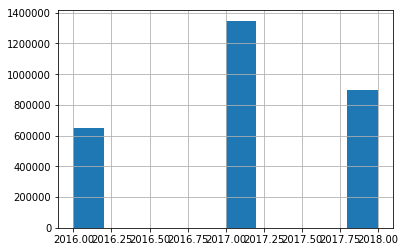

In [19]:
new_ticket.Issue_Year.hist()

## Graphs

Text(0.5, 1.0, 'Total Tickets by Violation Type')

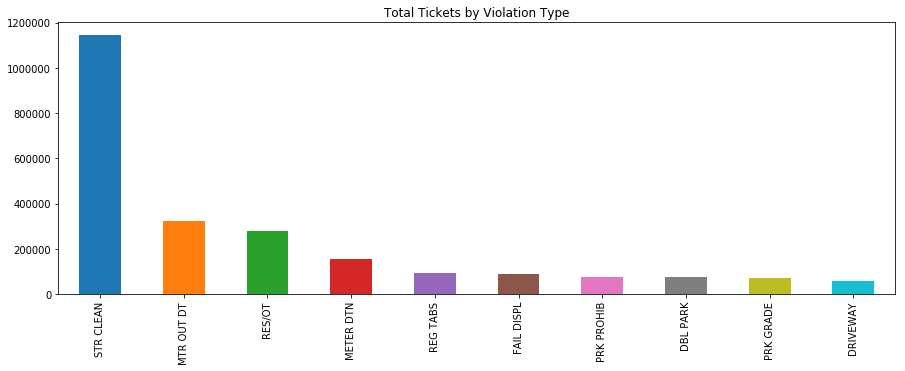

In [20]:
ax = new_ticket['Violation_Desc'].value_counts().nlargest(10).plot(kind = 'bar', figsize = (15,5))
ax.set_title('Total Tickets by Violation Type')

Text(0.5, 1.0, 'Total Tickets of Violation Type monthly')

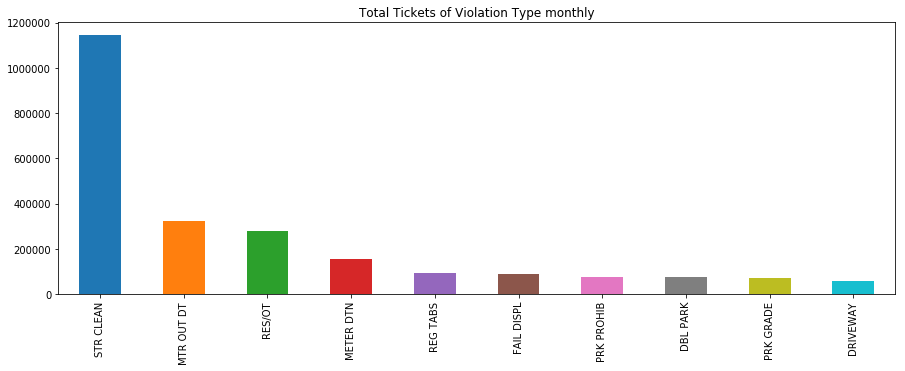

In [21]:
ax = new_ticket['Violation_Desc'].value_counts().nlargest(10).plot(kind = 'bar', figsize = (15,5))
ax.set_title('Total Tickets of Violation Type monthly')

Text(0.5, 1.0, 'Total Tickets by Vehicle Make')

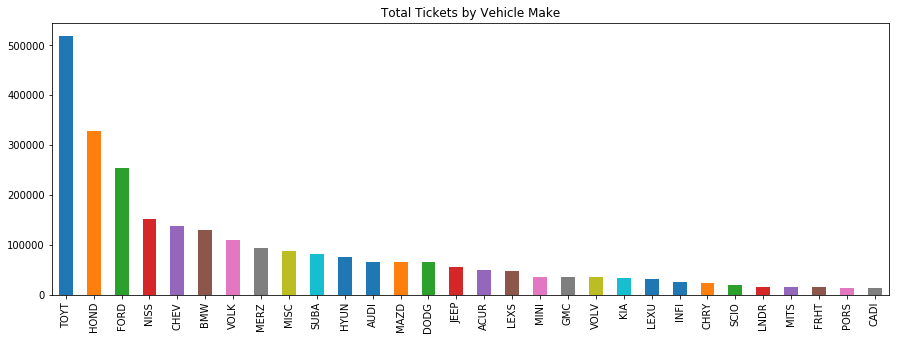

In [22]:
#Most common vehicle makes
ax = new_ticket['Veh_Make'].value_counts().nlargest(30).plot(kind = 'bar', figsize = (15,5))
ax.set_title('Total Tickets by Vehicle Make')

Text(0.5, 1.0, 'Total Tickets by Street_name')

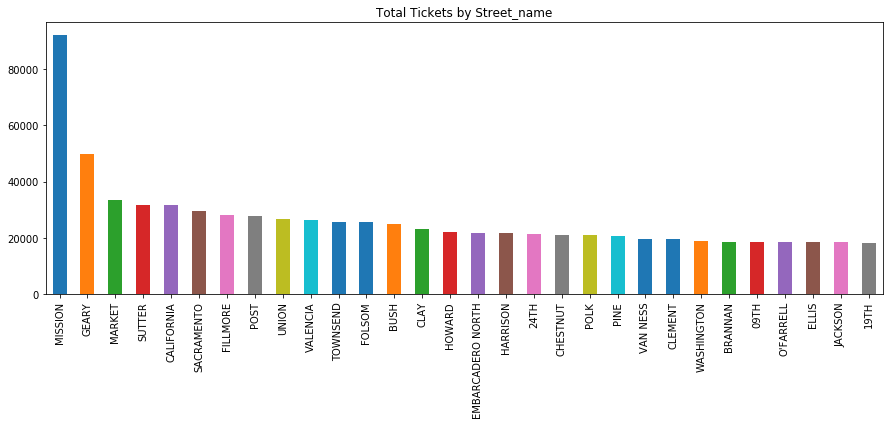

In [23]:
#Most common street name 
ax = new_ticket['Tick_Street_Name'].value_counts().nlargest(30).plot(kind = 'bar', figsize = (15,5))
ax.set_title('Total Tickets by Street_name')

Text(0.5, 1.0, 'Total Tickets by Street_number')

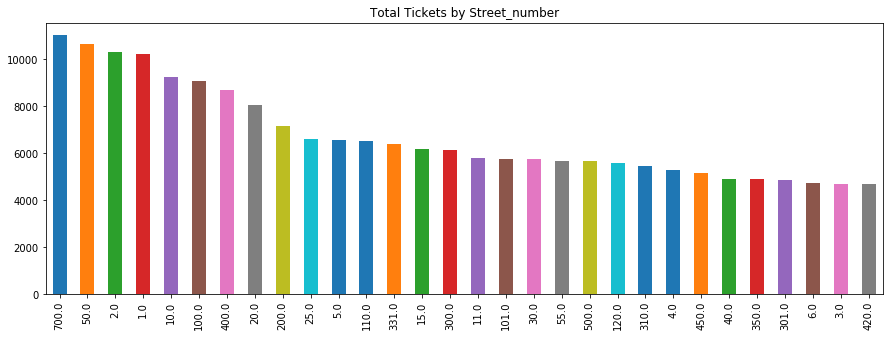

In [24]:
#Most common street_number
ax = new_ticket['Tick_Street_No'].value_counts().nlargest(30).plot(kind = 'bar', figsize = (15,5))
ax.set_title('Total Tickets by Street_number')

In [25]:
#ticksbyplate = result_query("Select TickRpPlate, count(*) total_tickets from ticket_data where TickRpplate not in ('None', ' ') group by  TickRPPlate")

In [26]:
# #Total tickets by neighborhood
# ax = new_ticket['nhood'].value_counts().nlargest(20).plot(kind = 'bar', figsize = (15,5))
# #ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# ax.set_title('Total Tickets by Neighborhood')

Text(0.5, 1.0, 'Total Tickets by Ticket_issue_time')

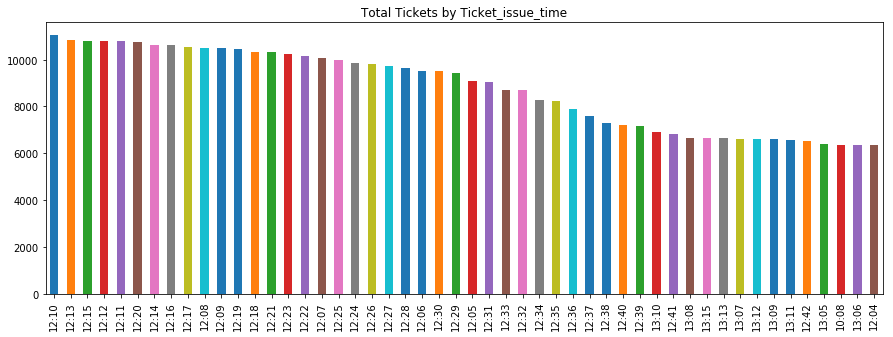

In [27]:
#Most common street_number

ax = new_ticket['Tick_Issue_Time'].value_counts()[:50].plot(kind = 'bar', figsize = (15,5))
ax.set_title('Total Tickets by Ticket_issue_time')

In [ ]:
#new_ticket['Hour'] =  new_ticket['Tick_Issue_Time'][7:10].apply(lambda x: pd.to_datetime(x).hour)

In [ ]:
#Types of Tickets by hour
type_by_hour = new_ticket[new_ticket['Violation_Desc'].isin(new_ticket['Violation_Desc'].value_counts().index.tolist())]
pivot_df = type_by_hour.groupby(['Hour', 'Violation_Desc'])['Hour'].count().unstack('Violation_Desc').fillna(0)
ax = pivot_df.plot(kind = 'bar', figsize = (15, 10), stacked = True)
ax.set_title('Total Tickets by Hour of Day, by Ticket Type')

In [37]:
import pickle 
pickle.dump(new_ticket, open('ticket_time.p', 'wb'))

## Total tickets by hour of day, by street name graph

In [36]:
#convert ticket time to hourly and assign a new column named 'Hour'
new_ticket['Hour'] = (new_ticket['Tick_Issue_Time']).apply(lambda x: pd.to_datetime(x).hour)  

In [44]:
#Using the Hour column to reassign the variable name Rush_hour
Rush_hour = new_ticket.Hour[(new_ticket.Hour >= 7) & (new_ticket.Hour <=10)]

In [45]:
#see if street_name is inside the bag of street_name, if yes, count the value, and convert it to a list
type_by_hour = new_ticket[new_ticket['Tick_Street_Name'].isin(new_ticket['Tick_Street_Name'].value_counts().index.tolist())]
#groupby street_name, then rush_hour
#count street_name after groupby
#unstack Rush_hour and if there's Na in hour, fill in with 0
pivot_df = type_by_hour.groupby(['Tick_Street_Name', Rush_hour])['Tick_Street_Name'].count().unstack(Rush_hour).fillna(0)
ax = pivot_df.plot(kind = 'bar', figsize = (15, 10), stacked = True)
ax.set_title('Total Tickets by Hour of Day, by Street Name')

ValueError: cannot reindex from a duplicate axis

In [ ]:
#boxplot
new_ticket.boxplot('', by='b_no_rating_of_driver')

In [ ]:
sns.pairplot(new_ticket)

/Users/angellei/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/angellei/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


In [ ]:
#fix dates
ticket_issue_date = new_ticket.Tick_Issue_Date.to_datetime(new_ticket.Tick_Issue_Date, '%Y-%m-%d')
ticket_issue_time = new_ticket.Tick_Issue_Time.to_datetime(new_ticket.Tick_Issue_Time, '%Y-%m-%d')

In [ ]:
new_ticket = ticket.drop(ticket.columns[0], axis=1)


## Time Series